# Лабораторная работа по теме ''Хеши''

<img src="http://www.quickmeme.com/img/2d/2d264dff64233370bcf7e143b9779268af0c5b3e86bd7370d88465d320fadbdc.jpg" width="150" style="float:right">

#### Выполнил Шишацкий Михаил
> Markdown сложный

## 1. Теоретическая часть

### 1.1. Примеры

Назовём семейство хеш-функций равномерно распределённым, если при равномерном случайном выборе хеш-функции случайная величина, равная значению хеш-функции на фиксированном элементе $x$,
распределена на пространстве значений равномерно. Далее, $2$-независимым семейством хеш-функций
называется семейство, в котором описанные выше случайные величины для любых двух различных
фиксированных $x$ и $y$ независимы. Приведём пример семейства хеш-функций, которое:

a) равномерно распределено, но не является $2$-независимым:
    
    Например, семейтво вида: h(x) = a, число a пробегает равномерно все значения в пространстве значений размера M > 1.
    
    Понятно, что такое пространство является равномерно распределённым. При этом, семейство не является 2-независимым:
    
    p(h(x) == A && h(y) == B) = [ 0, если A=/=B, или 1/M, если A==B ] =/= p(h(x) == A) * p(h(y) == B) = 1/M^2.

b) является 2-независимым, но не является равномерно распределённым:

    Например, семейство из одной функции h(x) = С, где С \in {0, 1, ... , M} - произвольная константа.
    
    Семейство является 2-независимым: p(h(x) == A && h(y) == B) = p(A == B == C) = p(A == C) * p(B == C) = p(h(x) == A) * p(h(y) == B).
    
    При этом, если множество значений шире {C}, семейство не является равномерно распределённым.
    
    
### 1.2. Последовательности ДНК

Рассмотрим задачу хеширования последовательностей ДНК. Напоминаем, что ДНК являются длинными последовательностями из четырёх аминокислот, которые мы будем обозначать буквами A, T,
G и C. Пусть хеш-функция h принимает на вход ДНК и в качестве хеша возвращает сумму номеров
аминокислот по какому-то большому простому модулю, а затем складывает в хеш-таблицу с открытым
ключом. Чем плоха такая реализация хеширования?

__Ответ:__

Если в таблице содержатся цепочки, имеющие не очень отличающиеся длины, значение всевозможных хешей не так велико:
от $1 \cdot L_{min}$ до $4 \cdot L_{max}$. Значит, при очень большом количестве ключей Run будет стартовать примерно в одном месте, что приводит к линейной асимптотике работы одной операции. В части 2, посвященной хеш-таблицам, этот результат подтвержден экспериментально.


## 2. Хеш-таблицы

__Задача__: Реализуйте на C++ следующие хеш-таблицы:

- Открытый ключ, линейное пробирование;
- Открытый ключ, квадратичное пробирование;
- Открытый ключ, двойное хеширование;
- Хеширование цепочками с расширением в 2 раза при заполненности в 75% / 95%;
- Cuckoo hashtable.

Проведите эксперименты с разными комбинациями хеш-таблиц и хеш-функций и замерьте среднее
время ответа на случайные запросы следующим образом:

- Переберите $n$ от $10$ до $100000000$ с увеличением выборки в $1.5$ раза (то есть $10, 10 \cdot 1.5, 10 \cdot 1.5^2, \ldots$)
- Для каждого n сгенерируйте 10 разных наборов ключей и на каждом из них проведите следующее
    - Сгенерируйте n ключей, половина из которых есть в исходных n, а другая — нет. 
      Назовём этот набор Q. Не забудьте случайным образом перемешать Q.
    - Начните замер времени работы, начиная с этого шага.
    - Добавьте все ключи в таблицу.
    - По очереди переберите все ключи из Q и с вероятностью $\frac{1}{10}$ вызовите remove для этого ключа,
      в остальных случаях вызовите find.
    - Остановите замер времени на текущей итерации.
- Усредните предыдущий этап по всем $10$ выборкам и поделите на $|Q|$, получив амортизированное
  время работы одной операции.
- Постройте график зависимости усреднённого амортизированного времени на одну операцию для
  разных сочетаний хеш-таблиц и хеш-функций. Отразите на графике дополнительно функции $\sqrt{n}$
  и $\log{n}$.


### Подготовка к работе

Для анализа и бенчмаркинга хеш-таблиц я создал набор [шаблонных функций](./include/HashTables/Benchmark/),  
позволяющих удобно тестировать и измерять время работы произвольной хеш-таблицы на произвольном хеше. 
Из-за небольшого количества времени на прогон всех бенчмарков, в функциях введён timeout, когда они обязаны завершиться
даже если бенчмарк не закончен.

> Если где-то различаются наборы хешей, по которым сравниваются структуры, хотя этого не было заявлено, 
  то я скорее всего просто не успел прогнать бенчмарки для этих хешей

Далее необходимо реализовать хеши и таблицы требуемых типов. Для использования хешей md5 и sha256 были взяты реализации 
из проекта [hash-library](https://github.com/stbrumme/hash-library/tree/a8a88f8acbdd97b854b6ac61e53177dc7870f32f), хеш murmur3 был
взят из проекта [murmur3](https://github.com/PeterScott/murmur3).

Некоторые классы хешей пришлось ограничить: 
функции типа $(a_{n−1}k^{n−1} + \ldots + a_1 k + a_0) \operatorname{mod} p$ были рассмотрены только для
$2, 3, 5$ индексов для получения соответственно $2-, 3-, 5-$независимых семейств (2IndepPolyHash, 3IndepPolyHash, 5IndepPolyHash).

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt 
import matplotlib.cm as cm   

In [2]:
indep5_hashes = [
    "Number_Indep5PolyHash"
]

indep3_hashes = [
    "Number_TabulationHash",
    "Number_Indep3PolyHash"
]

indep2_hashes = [
    "Number_Indep2PolyHash",
]

indep_hashes = indep2_hashes + \
               indep3_hashes + \
               indep5_hashes

crypto_hashes = [
    "String_Md5Hash",
    "String_Sha256Hash",
    "Number_Md5Hash",
    "Number_Sha256Hash"
]

other_hashes = [
    "String_StdHash",
    "String_RabinKarpHash",
    "String_Murmur3Hash",
    "Number_StdHash",
    "Number_Murmur3Hash"
]

bad_hash = [
    "String_DumbHash"
]

all_hashes = indep2_hashes + \
             indep3_hashes + \
             indep5_hashes + \
             crypto_hashes + \
             other_hashes

In [3]:
def display_results(set_name, from_idx, to_idx, hashes):
    fig, ax = plt.subplots(figsize=(20, 10))    
    df = pd.DataFrame()

    colors = cm.rainbow(np.linspace(0, 1, len(hashes)))

    for c, h in zip(colors, hashes):
        df = pd.read_csv('results/' + set_name + '/' + h + '.csv')
        df = df[from_idx:to_idx]
        df = df.rename(columns={'time' : 'machine time, ns', 'size' : 'set size'})
        df.plot.scatter(x='set size', y='machine time, ns', label=h, color=[c], ax=ax)

    return df['set size'].to_numpy()

### 2.1. Хеш-таблицы с открытым ключом

[__реализация__](./include/HashTables/OpenAddressing/OpenAddressing.hpp)

#### 2.1.1. Линейное пробирование

Для линейного пробирования справедливы такие оценки на асимптотику работы одной операции:

- $2$-независимое семейство хеш-функций обеспечивает асимптотику работы Run $O(\sqrt{n})$
- $3$-независимое семейство хеш-функций обеспечивает асимптотику работы Run $O(\log{n})$
- $5$-независимое семейство хеш-функций обеспечивает асимптотику работы Run $O(1)$

Проверим это, проанализировав результаты бенчмарков:

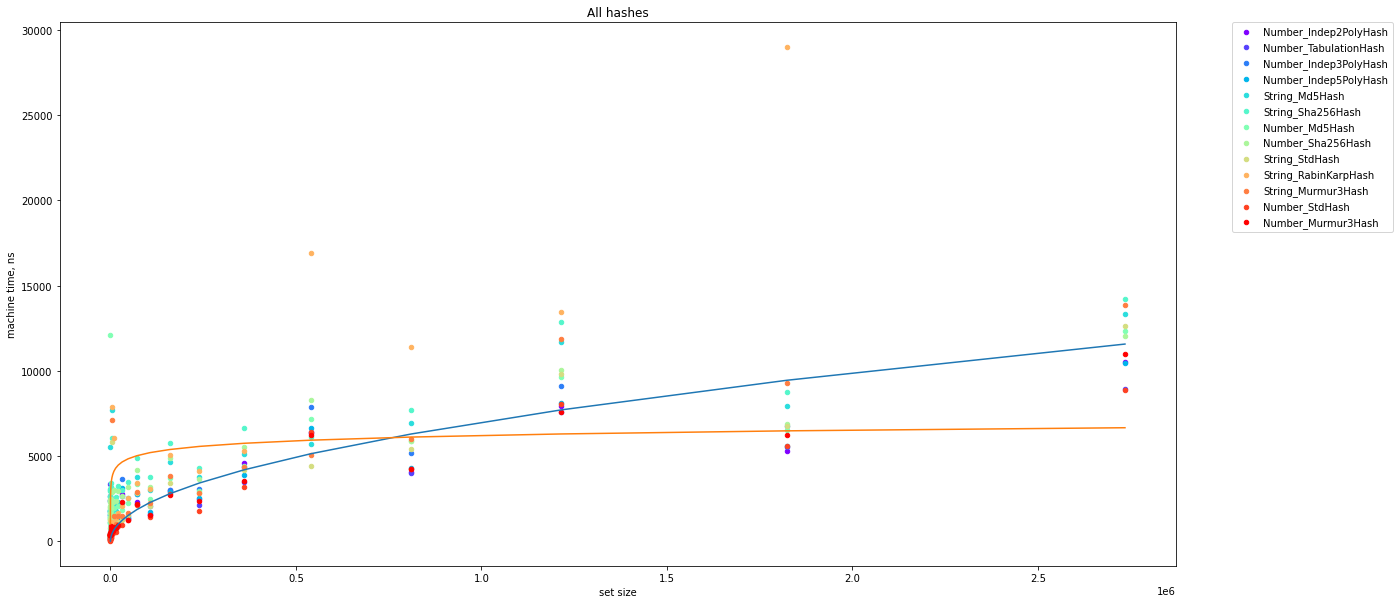

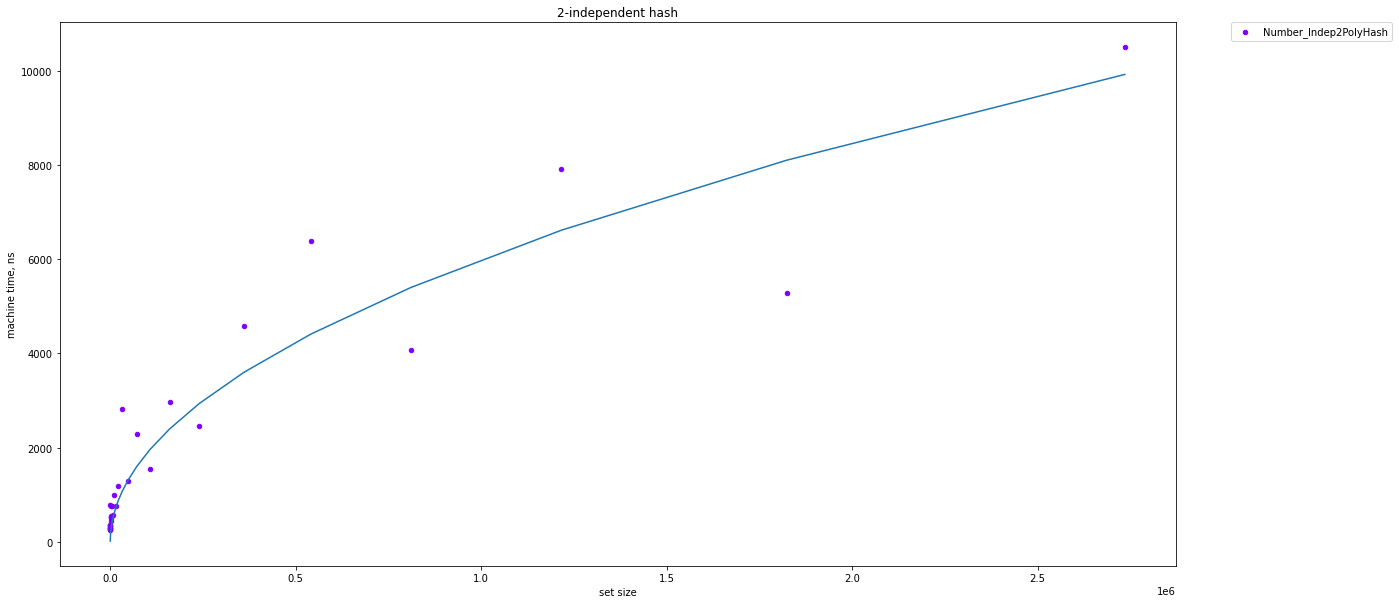

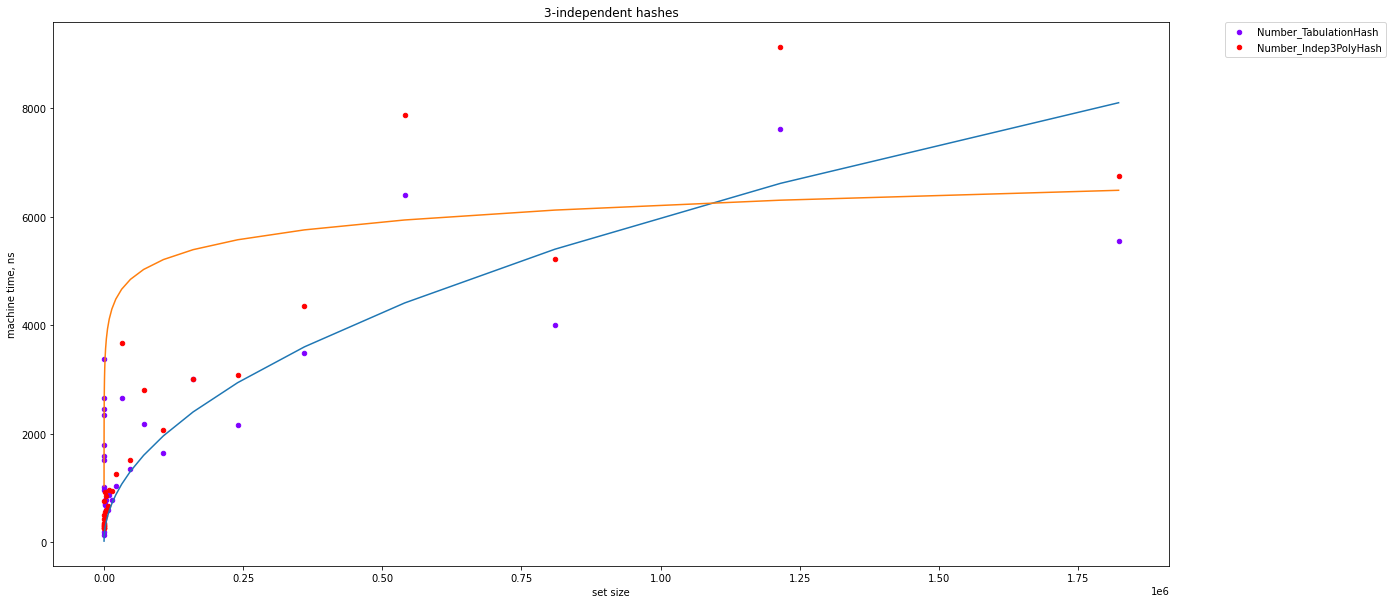

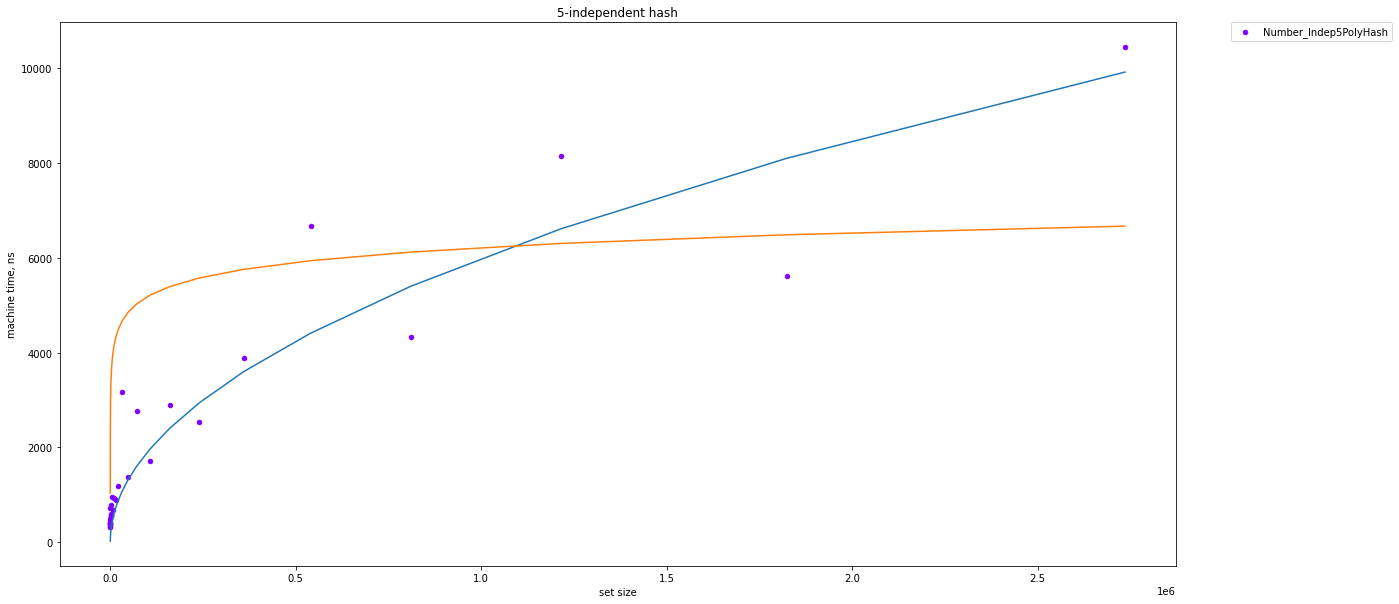

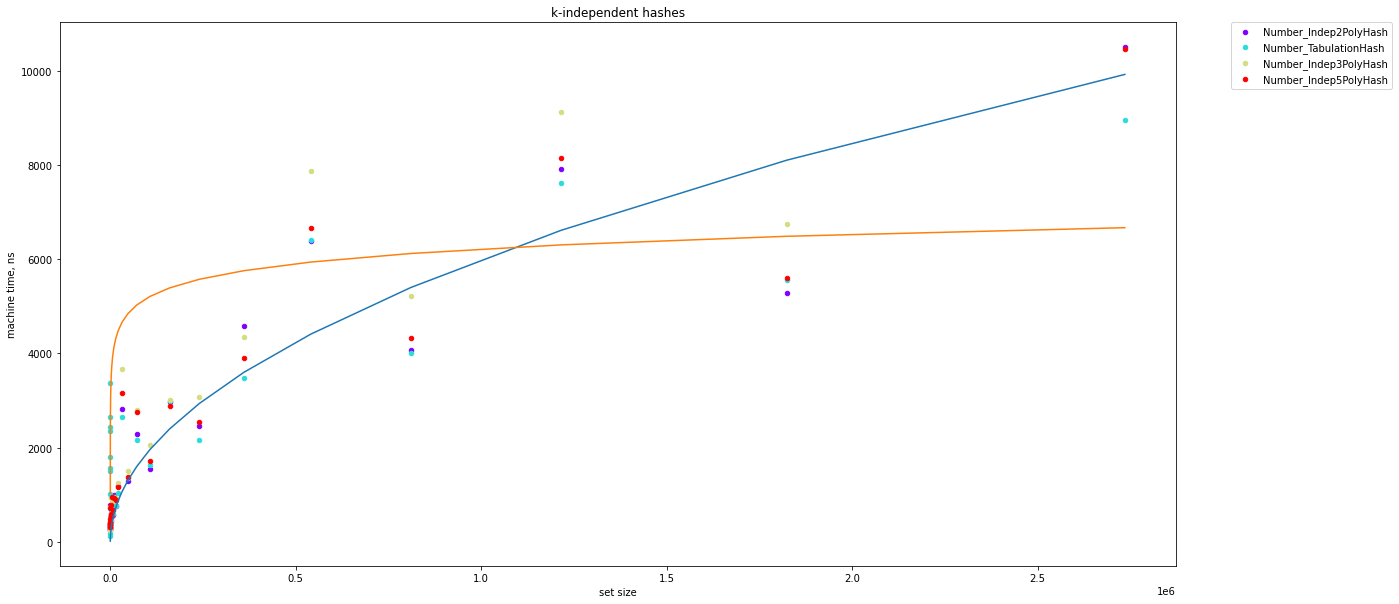

In [4]:
sizes = display_results("OpenLinear", 0, 32, all_hashes)
plt.plot(sizes, 7 * np.sqrt(sizes), sizes, 450 * np.log(sizes))    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("All hashes")
plt.show()

sizes = display_results("OpenLinear", 0, 32, indep2_hashes)
plt.plot(sizes, 6 * np.sqrt(sizes))    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("2-independent hash")
plt.show()

sizes = display_results("OpenLinear", 0, 31, indep3_hashes)
plt.plot(sizes, 6 * np.sqrt(sizes), sizes, 450 * np.log(sizes))    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("3-independent hashes")
plt.show()

sizes = display_results("OpenLinear", 0, 32, indep5_hashes)
plt.plot(sizes, 6 * np.sqrt(sizes), sizes, 450 * np.log(sizes))    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("5-independent hash")
plt.show()

sizes = display_results("OpenLinear", 0, 32, indep_hashes)
plt.plot(sizes, 6 * np.sqrt(sizes), sizes, 450 * np.log(sizes))    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("k-independent hashes")
plt.show()


Согласно результатам, таблицыы на $2$-независимых семействах действительно имеют время работы одной операции $O(\sqrt{n})$.
Остальные результаты плохо ложатся на представленные теорией асимптотики (есть шанс, что я что-то написал не так).

Посмотрим отдельно на пример плохого хеша:

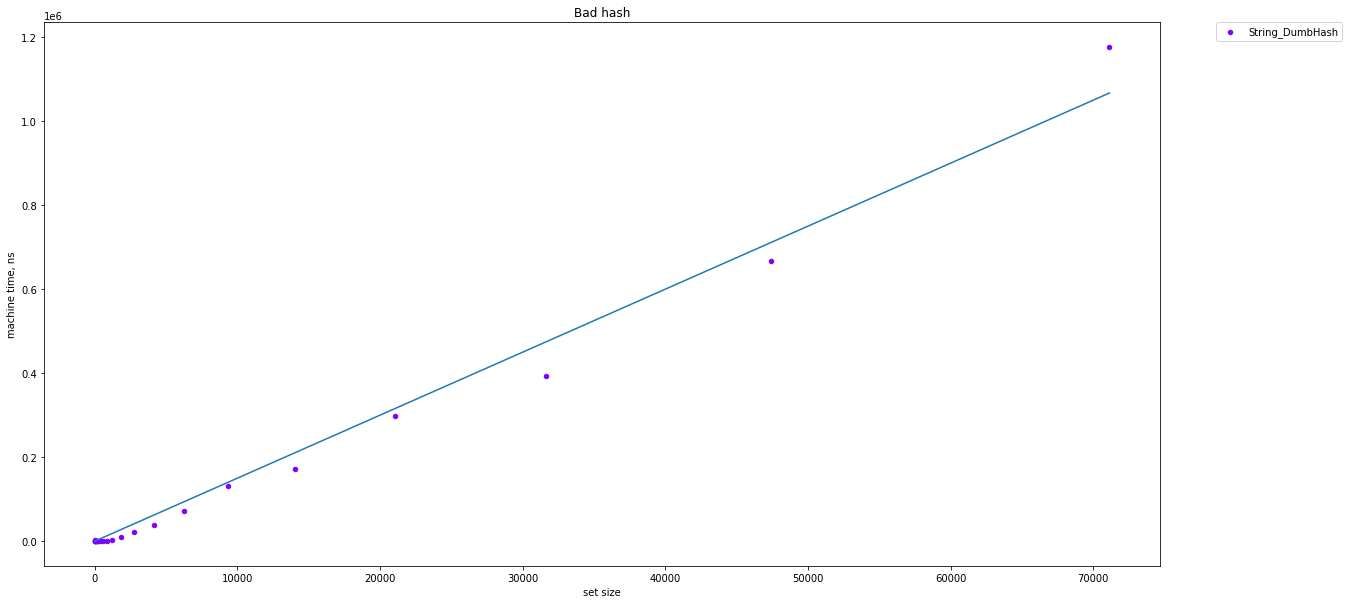

In [5]:
sizes = display_results("OpenLinear", 0, 32, bad_hash)  
plt.plot(sizes, 15 * sizes)    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("Bad hash")
plt.show()

Из графика видно, что с таким хешом операция над таблицей работает за $O(n)$

Рассмотрим отдельно криптографические хеши:

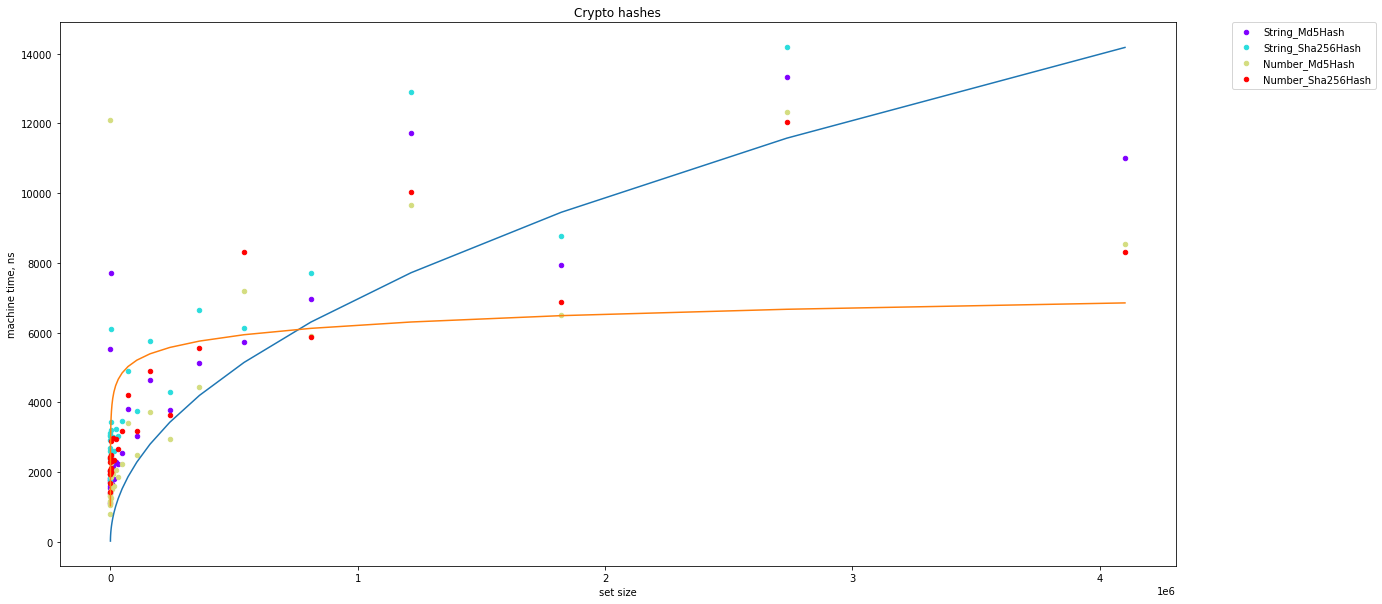

In [6]:
sizes = display_results("OpenLinear", 0, 34, crypto_hashes)  
plt.plot(sizes, 7 * np.sqrt(sizes), sizes, 450 * np.log(sizes))    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("Crypto hashes")
plt.show()

Cудя по результатам измерений, они $2$-и-более независимы. Их можно использовать в реализации хеш таблиц, но не нужно) 
Не нужно из-за большего времени подсчёта хеша.

#### 2.1.2. Квадратичное пробирование и двойное хеширование

Эти виды пробирования менее универсальны и не могут работать с любым хешом без потери производительности:

- Квадратичное пробирование даже в форме $\operatorname{Run}(x, i) = (\operatorname{hash}(x) + i * i * (-1)^{i}) \operatorname{mod} M$ покрывает все индексы таблицы не всегда. Например,
  если $M$ = 4, такая конструкция позволит отойти от хеша на шаги $0, -1, 0, -1, \ldots$, что не покроет все возможные значения остатков.
  Я нашел два выхода: использовать подходящие размеры хеш-таблицы. Например, если размер хеш-таблицы - простое число, циклов не возникнет, и мы
  покроем все значения. Но искать простые числа при расширении сложно асимптотически - $O(n\sqrt{n})$.
  Другой вариант - делать rehash при возникновении цикла и полагаться на теорию вероятности - рано или поздно мы найдем состояние, в котором 
  цикла нет. Для такой реализации необходимы равномерные семейства хеш-функций.
  
- Для двойного хеширования справедливы похожие опасения - можно не покрыть Run'ом все значения индексов. Тогда мы будем делать rehash как в предыдущем случае.

Анализ вероятности успеха и вреда для асимптотики сложно придумать поздней ночью, поэтому приведу доказательство результатами:

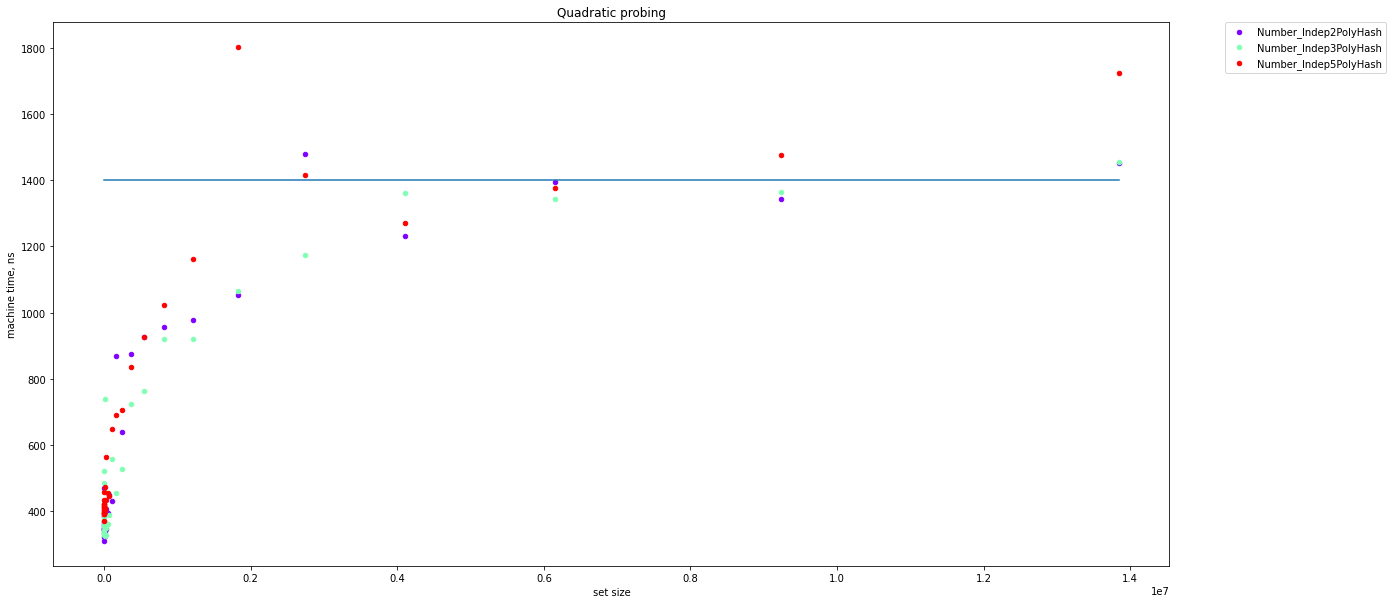

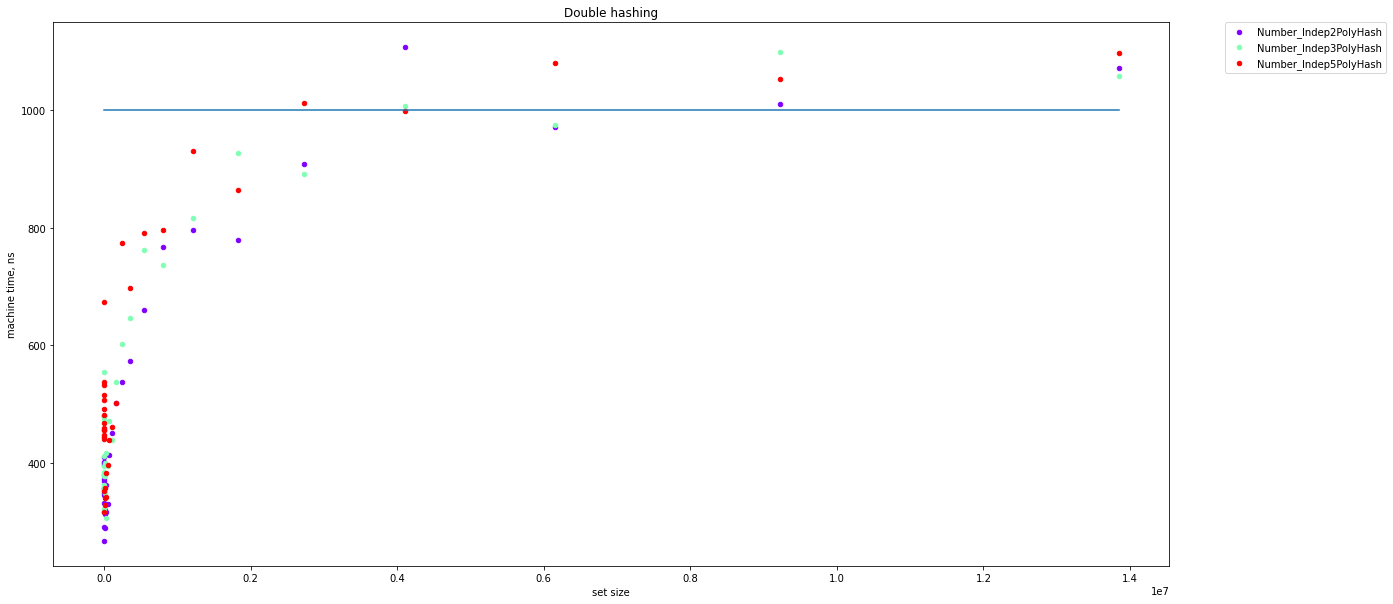

In [7]:
sizes = display_results("OpenQuadratic", 0, 36, ["Number_Indep2PolyHash", "Number_Indep3PolyHash", "Number_Indep5PolyHash"])  
plt.plot(sizes, [1400] * len(sizes))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("Quadratic probing")
plt.show()

sizes = display_results("OpenDoubleHashing", 0, 36, ["Number_Indep2PolyHash", "Number_Indep3PolyHash", "Number_Indep5PolyHash"])  
plt.plot(sizes, [1000] * len(sizes))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("Double hashing")
plt.show()

TabulationHash проигрывает в сравнении с полиномиальным хешем из-за долгого rehash (нужно обновить таблицу случайными числами). Для читаемости масштаба он убран с графика.

Как видно из графиков, достигается константная асимптотика работы одной операции. Double Hashing работает быстрее.

### 2.2. Хеш-таблицы с цепочками

[реализация](./include/HashTables/HashTables/SeparateChaining/)

Посмотрим на результаты для хештаблицы с расширением при заполнении на 75% и 95%:

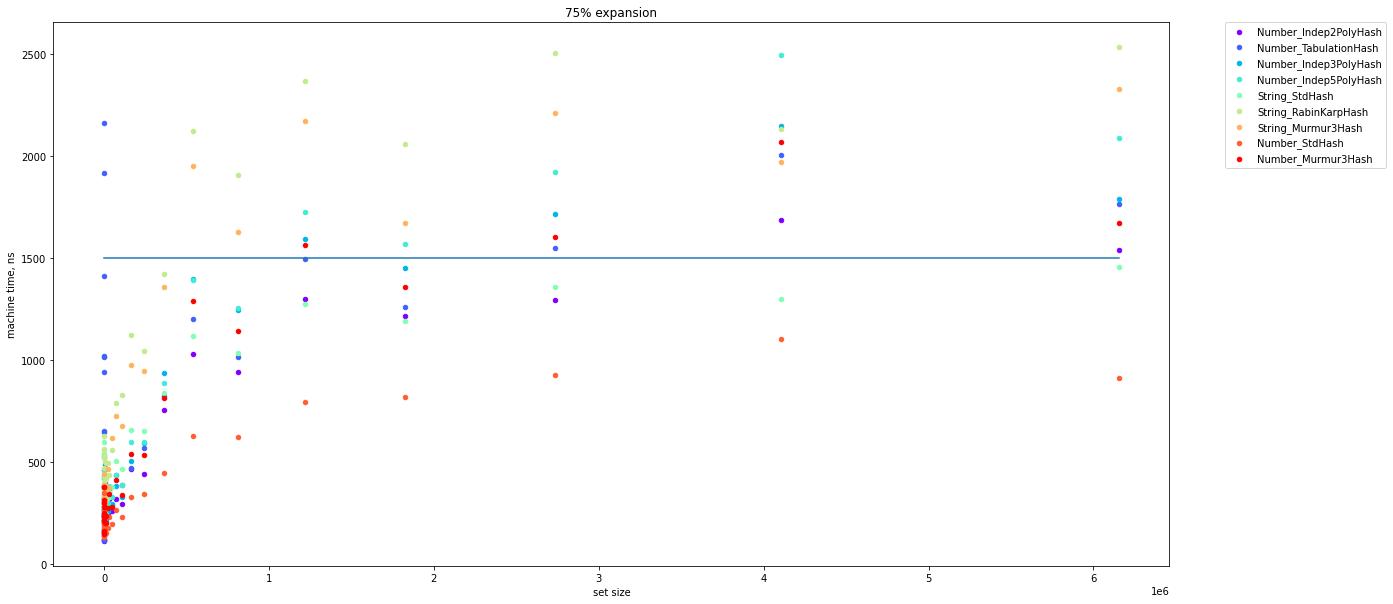

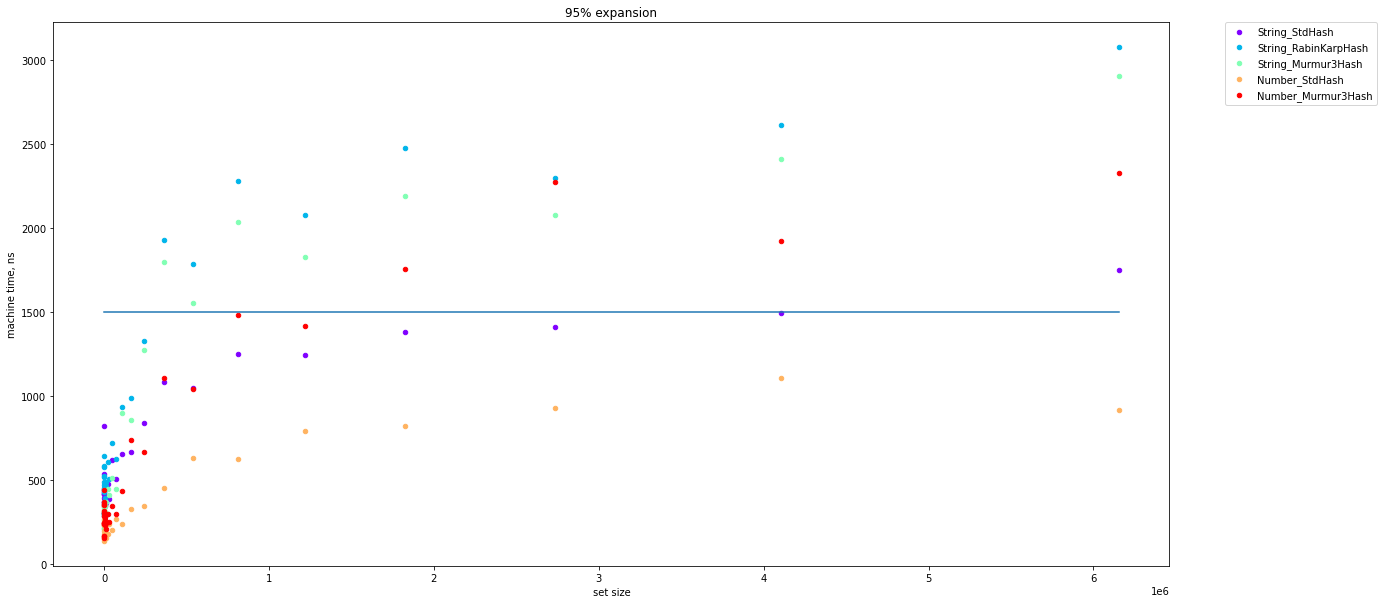

In [9]:
sizes = display_results("SeparateChaining75", 0, 34, indep_hashes + other_hashes)  
plt.plot(sizes, [1500] * len(sizes))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("75% expansion")
plt.show()

sizes = display_results("SeparateChaining95", 0, 34, other_hashes)  
plt.plot(sizes, [1500] * len(sizes))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("95% expansion")
plt.show()

Из результатов видно, что время операций на таблицах с ''хорошими'' хешами ложится на константную асимптотику.

### 2.3. Cuckoo hashing

[реализация](./include/HashTables/HashTables/Cuckoo/)

Хеш-семейство для хеширования кукушки должно быть равномерным. Иначе при возникновении цикла может возникнуть бесконечная рекурсия на вызовах rehash.
Поэтому здесь приведены результаты работы хеш таблицы на ''хороших'' хешах:

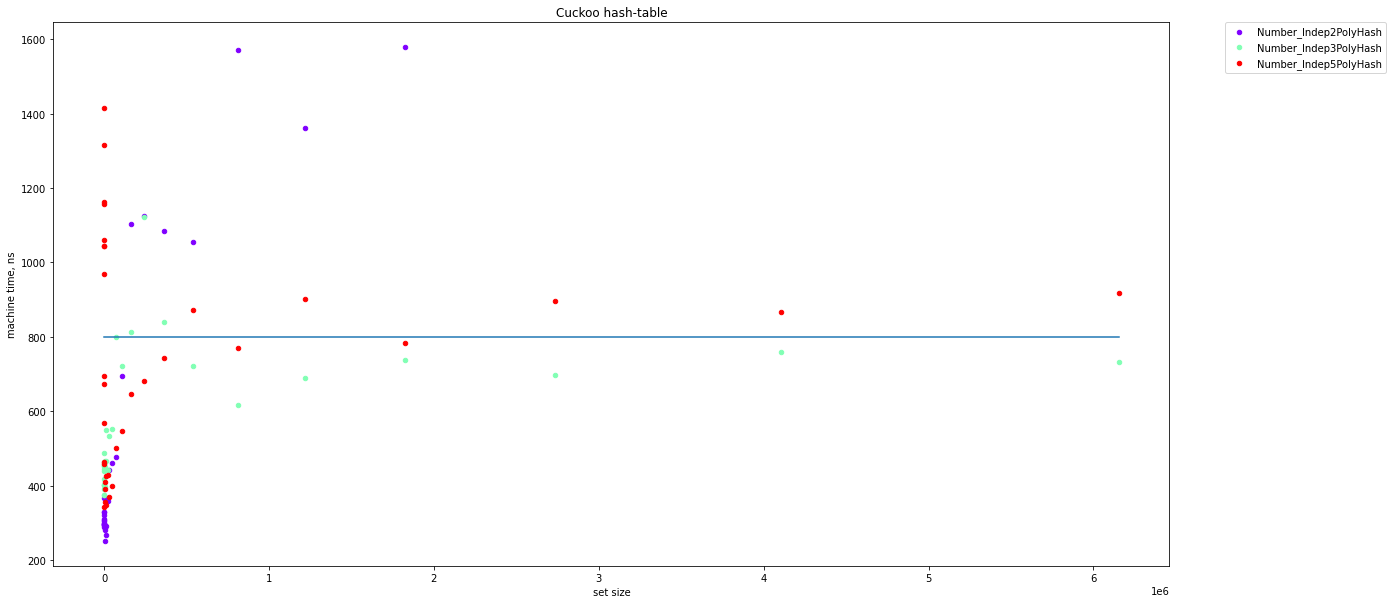

In [10]:
sizes = display_results("Cuckoo", 0, 34, ["Number_Indep2PolyHash", "Number_Indep3PolyHash", "Number_Indep5PolyHash"])  
plt.plot(sizes, [800] * len(sizes))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("Cuckoo hash-table")
plt.show()

TabulationHash, аналогично double hashing и quadratic hashing, проигрывает другому семейству хешей из-за медленного выполнения rehash.

На маленьких размерах заметны проблемы из-за частого вызова rehash, однако на больших размерах асимптотика одной операции оценивается константой. При этом, реальное значение константы меньше, чем в других реализациях - 1мс.

### Подытожим

0. Наиболее эффективными оказались хеш-таблицы cuckoo и double-hashing. Они обеспечивают константную асимптотику выполнения операции при наименьшем времени реального выполнения этой операции.

1. На маленьких размерах множества стоит полагаться на скорость работы хеша и особенности реализации таблицы, а не на их асимптотическую эффективность, так как по результатам замеров, время работы одной операции в таких диапазонах может не подчиняться заявленной асимптотике (наверное, ''качество'' данных в запросах к таблице тоже на это влияет)

2. Для реализации хеш-таблицы нужно использовать равномерные k-независимые хеши, так как они обеспечивают наилучшую асимптотику выполнения операции.

3. Криптографические хеши, согласно результатам, обеспечивают хорошие асимптотики, но на деле не эффективны из-за относительно
   медленного подсчёта хеш-значения.
   
![](https://ru.meming.world/images/ru/0/00/%D0%A7%D0%B5%D1%81%D1%82%D0%BD%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%D0%A8%D0%B0%D0%B1%D0%BB%D0%BE%D0%BD.jpg)